<a href="https://colab.research.google.com/github/Mamtapanchal-7/mamtapanchal/blob/main/Mamtaproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Room Price Prediction for StaySure Hotels

### step 1: import library

In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Step 2: Read Dataset

In [64]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Hotel Room Price Prediction for StaySure Hotels.csv")

df.head()

,hotel_city,room_type,season,days_to_checkin,competitor_avg_price,demand_index,local_event,room_availability_index,predicted_room_price_inr
0,Chennai,Standard,Peak,49,13471.22,0.79,0,0.66,3250.94
1,Goa,Standard,Holiday,8,14828.91,1.05,0,0.66,5838.59
2,Goa,Deluxe,Peak,42,14343.31,0.99,0,0.45,11324.52
3,Bangalore,Deluxe,Regular,80,4578.27,1.47,0,0.43,11463.48
4,Goa,Suite,Peak,61,14932.16,1.03,0,0.97,11903.07


### step 3: Basic Exploration

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hotel_city                1000 non-null   object 
 1   room_type                 1000 non-null   object 
 2   season                    1000 non-null   object 
 3   days_to_checkin           1000 non-null   int64  
 4   competitor_avg_price      1000 non-null   float64
 5   demand_index              1000 non-null   float64
 6   local_event               1000 non-null   int64  
 7   room_availability_index   1000 non-null   float64
 8   predicted_room_price_inr  1000 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 70.4+ KB


In [68]:
# Missing value count
df.isna().sum()

,0
hotel_city,0
room_type,0
season,0
days_to_checkin,0
competitor_avg_price,0
demand_index,0
local_event,0
room_availability_index,0
predicted_room_price_inr,0


In [69]:
df.describe()

,days_to_checkin,competitor_avg_price,demand_index,local_event,room_availability_index,predicted_room_price_inr
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,43.372000,8886.371880,1.10256,0.146000,0.699700,8781.805700
std,25.865588,3726.107227,0.22490,0.353283,0.173332,4936.299401
min,0.000000,2002.370000,0.70000,0.000000,0.400000,1579.160000
25%,21.000000,5807.880000,0.91000,0.000000,0.550000,5339.277500
50%,42.000000,9096.020000,1.10000,0.000000,0.710000,7415.340000
75%,66.000000,12122.112500,1.29000,0.000000,0.850000,10762.985000
max,89.000000,14989.650000,1.50000,1.000000,1.000000,30000.000000


###  Step 4: Data Processing

In [70]:
#  Check and drop missing values
df = df.dropna()

df.select_dtypes(include='object').columns

# Convert all text (object) columns to dummy/encoded columns
df_encoded = pd.get_dummies(df, drop_first=True)

 ### Step 5: Define Features and Target

In [71]:
X = df_encoded.drop('predicted_room_price_inr', axis=1)
y = df_encoded['predicted_room_price_inr']

### Step 6: Train-Test Split

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 7: Train the Model

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 8: Evaluate the Model


In [74]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1661627.6672316608
R² Score: 0.943117882464405


### Step 9: Visualize the Results

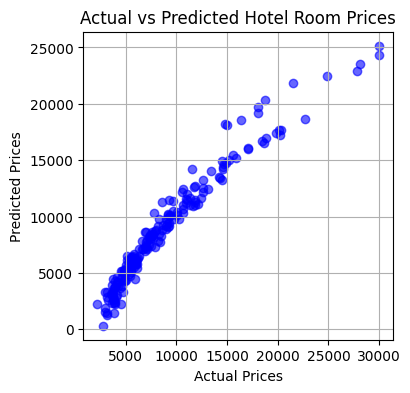

In [75]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Hotel Room Prices")
plt.grid(True)
plt.show()